In [ ]:
import numpy as np
import seaborn as sns
import pandas as pd # Для работы с данными
import scipy.stats # При работе со статистикой
import matplotlib.pyplot as plt  # Библиотека для визуализации результатов
import matplotlib.font_manager 
%matplotlib inline

<p style="align: center;"><img align=center src="https://netology.ru/backend/tilda/images/tild3439-3364-4535-b334-656263633534__main.svg"  width=900></p>
<h3 style="text-align: center;"><b>Поиск выбросов и генерация новых признаков</b></h3>

<h1><u>План урока</u></h1>

<p><font size="3" face="Arial">
<ul type="square"><a href="#1"><li>Выбросы.</li></a><a href="#2"><li>Методы выявления выбросов.</li></a><ul><a href="#3"><li>Статистические тесты.</li></a><a href="#4"><li>Модельные тесты.</li></a><a href="#5"><li>Итерационные методы.</li></a><a href="#6"><li>Метрические методы.</li></a><a href="#7"><li>Методы машинного обучения.</li></a></ul><a href="#8"><li>Практика.</li><a href="#9"><li>Генерация новых признаков.</li></a><ul><a href="#10"><li>Вещественные признаки.</li></a><a href="#11"><li>Категориальные признаки.</li><a href="#12"><li>Временные признаки.</li></a></ul></font></p>

<h2>Выбросы</h2>
<p id="1">Зачастую в различных задачах по машинному обучению мы сталкиваемся с проблемой выбросов в исходных данных. Это проблема стоит нашего внимания, поскольку это может сильно влиять на качество дальнейшего обучения модели и финальный результат. Этот урок будет посвящен методам выявления и отлавливания выбросов.</p>
<ul><li><b>Выброс</b> - это точки данных, которые не преднадлежат определенной популяции, <i>выпадают</i> из совокупности.</li></ul>
<p style="align: center;"><img align=center src="https://cf2.ppt-online.org/files2/slide/t/teZOdsTQ6Rlqu9zxpAHaFC5gWX8PUr0Bh7JVIwbDc2/slide-6.jpg"  width=700></p>
<div class="alert alert-info"><i>Какие могут быть причины появления таких выбросов?</i>
<ol><li>При ручной генерации датасета часто появляются ошибки в данных и становятся выбросами.</li><li>Наличие шумовых объектов, выпадающих из общего распределения датасета, тоже становятся выбросами.</li><li>Присутствие объектов "других" выборок также пагубно сказывается на "чистоте" данных.</li></ol></div>

<h2>Методы выявления выбросов</h2>
<p id="2">На данный момент существует много различных методов выявления и устранения выбросов. Рассмотрим некоторые из них.</p>
<h3>Статистические тесты</h3>
<p id="3">Самый популярный метод для отлавливания выбросов в обычных ситуациях - это статистичесике тесты. При этом смотрят стандартное отклонение, строят боксплот, распределение данных, чтобы понять где есть какие-то экстремальные, выбивающиеся значения из общей картины. Часто бывает полезно построить монотонное преобразование, чтобы привести к нормальному распределению для поиска выбросов.</p>
<p style="align: center;"><img align=center src="https://sun9-8.userapi.com/impg/2fPjy5_LYFcZoU3cNVaOoAFjNoj4XM57VHaxQQ/QOxt_B8tF7k.jpg?size=933x635&quality=96&sign=dbce4cdc23781339c02cf54baaf2e29d&type=album"  width=900></p>
Пример боксплота для выявления выбросов.
<p style="align: center;"><img align=center src="https://sun9-10.userapi.com/impg/Cxf1NHysk-tZCljsH1LYlacz9nzRoWUAIwrj-w/sdpUSDKgsLA.jpg?size=412x441&quality=96&sign=1c4988dd2f116b8146d025678fa35139&type=album"  width=900></p>
<h3>Модельные тесты</h3>
<p id="4">Вторым по популярности методом являются модельные тесты. Бывает полезно построить модель, которая описывает данные, для предсказания того признака, который мы хотим проверить. При этом изначально предполагается, что в данных есть какая-то зависимость (линейная, квадратичная, экспоненциальная и т.д.). Таким образом, в тех местах, где модель ошибается сильнее всего, там и будут появляться выбросы.</p>
<p style="align: center;"><img align=center src="https://alexanderdyakonov.files.wordpress.com/2017/04/fig4_poly.png?w=700"  width=900></p>
<h3>Итерационные методы</h3>
<p id="5">Самым эффективным тестом из итерационных методов считается построение оболочек в n-пространстве признаков. В этом методе строится "огибающая оболочка" датасета. После этого проверяют те данные, на которых пострилась эта оболочка. И так повторяют итерационно, до тех пор пока не будет ясно, что мы заметили/не заметили выброс.</p>
<p style="align: center;"><img align=center src="https://alexanderdyakonov.files.wordpress.com/2017/04/fig4_vypukl.png"  width=900></p>
<h3>Метрические методы</h3>
<p id="6">Существуют методы для данных, где используются метрические модели. Метрические методы более приблежены к методам машинного обучения. 
<ul><li>kNN</li>
    Когда предполагается, что объекты одинакового типа находятся рядом в признаковом пространстве, мы можем посмотреть какие у нас есть выбросы (далекие объекты) с точки зрения метода ближайших соседей (kNN, англ. k-nearest neighbors). Стоит заметить, что рассматривается не каждый признак по отдельности, а все сразу в общем признаковом пространстве.
<p style="align: center;"><img align=center src="https://alexanderdyakonov.files.wordpress.com/2017/04/fig2_nns.png"  width=900></p>
    <li>DBSCAN</li>
    С точки зрения методов кластеризации, можно использовать DBSCAN для построения кластеров, и далее рассматривать объекты, которые не попали в кластеры и общую картину данных. 
</ul>
<h3>Методы машинного обучения</h3>
<ul id="7"><li>Метод опорных векторов для одного класса</li>
    Как известно, метод опорных веткоров строит разделяющая гиперплоскость между двумя классами. В применении к выбросам предполагается, что есть один  класс и все остальное - внешнее пространство. Далее мы пытаемся построить прямую/гиперплоскость и окрестность вокруг нее и с помощью этого рассматривая отступы выявляем выбросы.
<li>Изолирующий лес</li>
    Когда мы строим деревья, мы стараемся расщепить их так, чтобы как можно больше извлечь информации о имеющихся признаках. Таким образом, мы берем случайный признак в нашем датасете и случайно его делим, при помощи какого-то условия, до тех пор пока дерево полностью не построится (в каждом листе один объъект). И дальше из этих деревьев строится лес (также случайно). Именно за счет условия случайности можно проще выделить какие-то аномальные/выпадающие выбросы.</ul>
    <p style="align: center;"><img align=center src="https://alexanderdyakonov.files.wordpress.com/2017/04/fig_forest.png"  width=900></p>

<h2>Практика</h2>
<p id="8">Рассмотрим небольшие примеры на практике по поиску выбросов с помощью встроенных методов scikit-learn.</p>

In [ ]:
# подгружаем необходимые библиотеки
from sklearn.covariance import EllipticEnvelope
from sklearn.svm import OneClassSVM
from sklearn.datasets import load_wine
from sklearn import svm
from sklearn.ensemble import IsolationForest
from sklearn.cluster import DBSCAN
from sklearn.neighbors import LocalOutlierFactor
from sklearn import metrics
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler

<p>Будем работать с популярным датасетом о винах. для изучения выбросов.</p>

In [ ]:
X_hist = load_wine()

In [ ]:
X_hist = pd.DataFrame(data=X_hist['data'], columns=X_hist['feature_names'])
X_hist.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


Для начала, посмотрим на общую гистограмму датасета.

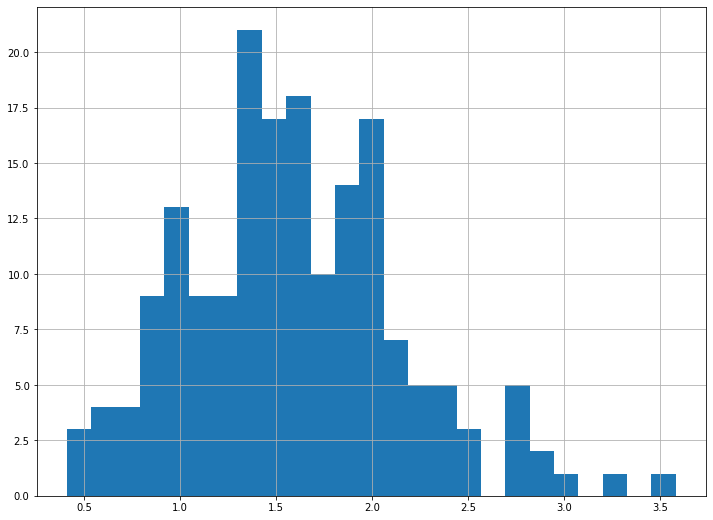

In [ ]:
X_hist['proanthocyanins'].hist(bins=25, figsize=(12,9))

На тех же самых данных удобно построить боксплот, на котором как раз хорошо видны предполагаемые выбросы.

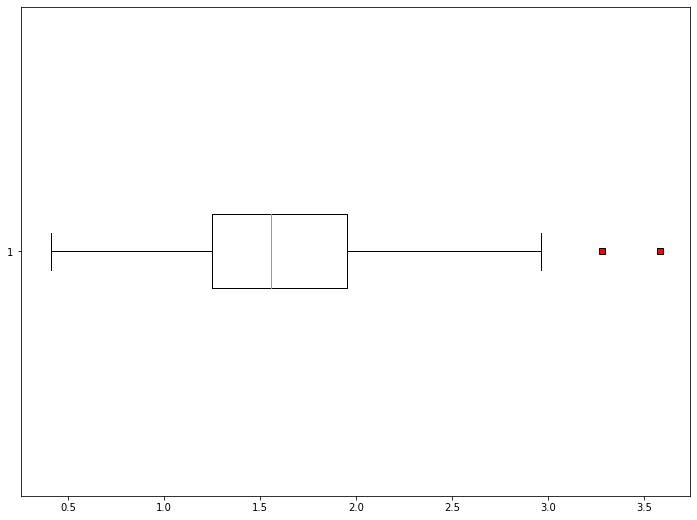

In [ ]:
red_square = dict(markerfacecolor='r', marker='s') # выделим предполагаемые выбросы
fig, ax = plt.subplots(figsize=(12,9))
ax.boxplot(X_hist['proanthocyanins'], vert=False, flierprops=red_square)
plt.show()

Рассмотрим уже готовый пример из scikit-learn. Здесь используется метод из кластеризации - метод опорных векторов (one class SVM).

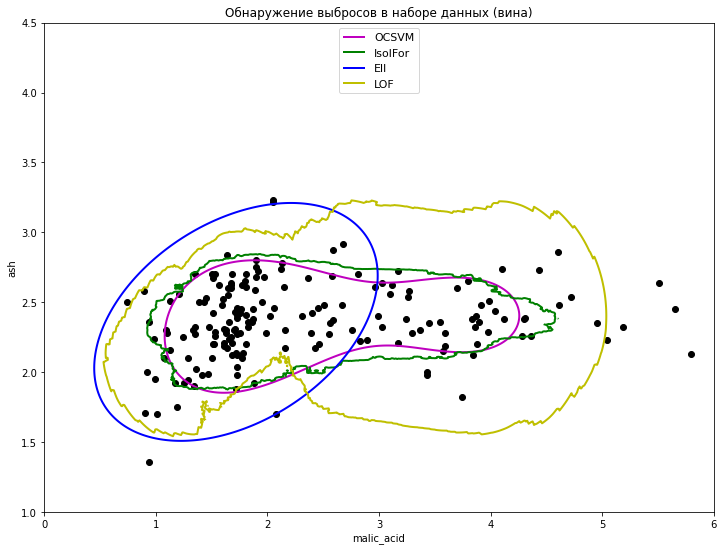

Получаем разделяющую поверхность, где видны выбросы данных


In [ ]:
# Author: Virgile Fritsch <virgile.fritsch@inria.fr>
# License: BSD 3 clause
classifiers = {
    "OCSVM": OneClassSVM(nu=0.25, gamma=0.35),
    "IsolFor":IsolationForest(),
    "Ell":EllipticEnvelope(contamination=0.3),
    "LOF":LocalOutlierFactor(novelty=True)}
colors = ['m', 'g', 'b', 'y']
legend1 = {}
legend2 = {}

# Загружаем данные
X1 = load_wine()['data'][:, [1, 2]]  # имеется два кластера

# Выделяем границы обнаружения выбросов с помощью нескольких классификаторов
# метод meshgrid используется для красивой отрисовки
xx1, yy1 = np.meshgrid(np.linspace(0, 6, 500), np.linspace(1, 4.5, 500))
for i, (clf_name, clf) in enumerate(classifiers.items()):
    plt.figure(1, figsize=(12,9))
    clf.fit(X1)
    Z1 = clf.decision_function(np.c_[xx1.ravel(), yy1.ravel()])
    Z1 = Z1.reshape(xx1.shape)
    legend1[clf_name] = plt.contour(
        xx1, yy1, Z1, levels=[0], linewidths=2, colors=colors[i])
    
#Z1 = LocalOutlierFactor().fit_predict(X1)
#Z1 = Z1.reshape(xx1.shape)
#legend1['LOF'] = plt.contour(xx1, yy1, Z1, levels=[0], linewidths=2, colors=colors[i])

legend1_values_list = list(legend1.values())
legend1_keys_list = list(legend1.keys())

# Отрисовка результатов (= форма облака точек данных)
plt.figure(1, figsize=(12,9))  # 2 кластера
plt.title("Обнаружение выбросов в наборе данных (вина)")
plt.scatter(X1[:, 0], X1[:, 1], color='black')

plt.xlim((xx1.min(), xx1.max()))
plt.ylim((yy1.min(), yy1.max()))
plt.legend((legend1_values_list[0].collections[0],legend1_values_list[1].collections[0],legend1_values_list[2].collections[0],legend1_values_list[3].collections[0]),
           (legend1_keys_list[0], legend1_keys_list[1],legend1_keys_list[2],legend1_keys_list[3]),
           loc="upper center",
           prop=matplotlib.font_manager.FontProperties(size=11))
plt.ylabel("ash")
plt.xlabel("malic_acid")
plt.show()
print('Получаем разделяющую поверхность, где видны выбросы данных')

Рассмотрим другой готовый пример, уже на искусственных данных.

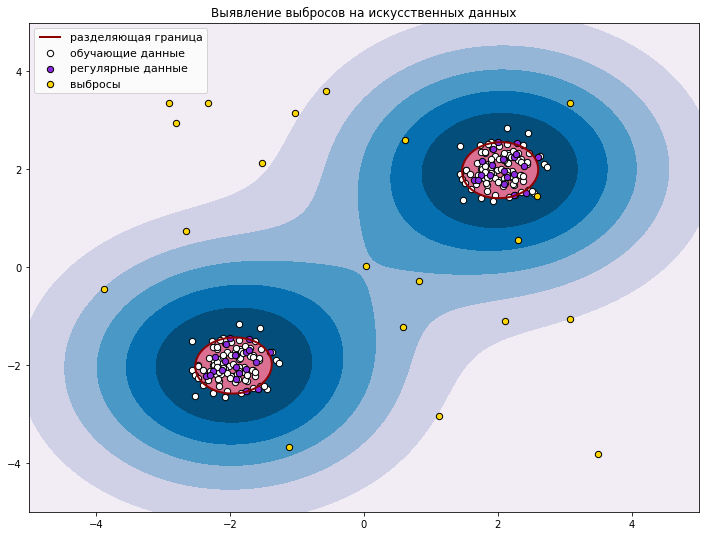

In [ ]:
xx, yy = np.meshgrid(np.linspace(-5, 5, 500), np.linspace(-5, 5, 500))
# Генерируем датасет
X = 0.3 * np.random.randn(100, 2)
X_train = np.r_[X + 2, X - 2]
X = 0.3 * np.random.randn(20, 2)
X_test = np.r_[X + 2, X - 2]
# Также генерируем некоторые аномальные точки (выбросы)
X_outliers = np.random.uniform(low=-4, high=4, size=(20, 2))

# Обучение, предсказываем значения
clf = svm.OneClassSVM(nu=0.2, kernel="rbf",gamma=0.2)
clf.fit(X_train)
y_pred_train = clf.predict(X_train)
y_pred_test = clf.predict(X_test)
y_pred_outliers = clf.predict(X_outliers)
n_error_train = y_pred_train[y_pred_train == -1].size
n_error_test = y_pred_test[y_pred_test == -1].size
n_error_outliers = y_pred_outliers[y_pred_outliers == 1].size

# Построим линию, точки и ближайшие векторы к плоскости
# Разделяющая поверхность
Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.figure(figsize=(12,9))
plt.title("Выявление выбросов на искусственных данных")
plt.contourf(xx, yy, Z, levels=np.linspace(Z.min(), 0, 7), cmap=plt.cm.PuBu)
a = plt.contour(xx, yy, Z, levels=[0], linewidths=2, colors='darkred')
plt.contourf(xx, yy, Z, levels=[0, Z.max()], colors='palevioletred')
s = 40
b1 = plt.scatter(X_train[:, 0], X_train[:, 1], c='white', s=s, edgecolors='k')
b2 = plt.scatter(X_test[:, 0], X_test[:, 1], c='blueviolet', s=s, edgecolors='k')
c = plt.scatter(X_outliers[:, 0], X_outliers[:, 1], c='gold', s=s, edgecolors='k')
plt.axis('tight')
plt.xlim((-5, 5))
plt.ylim((-5, 5))
plt.legend([a.collections[0], b1, b2, c],["разделяющая граница", "обучающие данные","регулярные данные", "выбросы"],loc="upper left",prop=matplotlib.font_manager.FontProperties(size=11))
plt.show()

Таким образом видим, что белые объекты - это объекты обучающей выборки. Фиолетовые - это те оъекты, которые метод признал нормальными/регулярными. А выбросы обозначены желтым цветом и хорошо видны.

Далее рассмотрим готовый пример с точки зрения метода изолирующего леса. Используется тот же самый пайплайн, как и в предыдущем примере. Здесь хорошо видны области с выбросами (более темные).

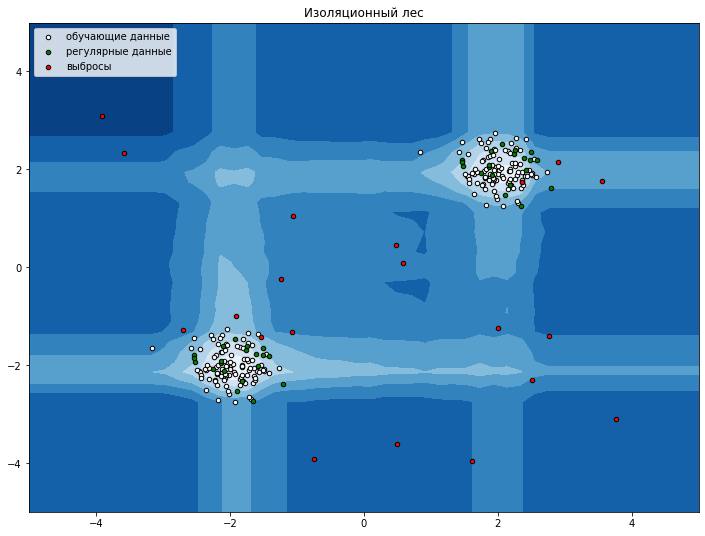

In [ ]:
clf = IsolationForest(max_samples=100)
clf.fit(X_train) # обучение
# предсказываем значения
y_pred_train = clf.predict(X_train)
y_pred_test = clf.predict(X_test)
y_pred_outliers = clf.predict(X_outliers)
# строим границы определяющие выбросы (разделяющая пов-ть)
xx, yy = np.meshgrid(np.linspace(-5, 5, 50), np.linspace(-5, 5, 50))
Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.figure(figsize=(12,9))
plt.title("Изоляционный лес")
plt.contourf(xx, yy, Z, cmap=plt.cm.Blues_r)
b1 = plt.scatter(X_train[:, 0], X_train[:, 1], c='white', s=20, edgecolor='k')
b2 = plt.scatter(X_test[:, 0], X_test[:, 1], c='green', s=20, edgecolor='k')
c = plt.scatter(X_outliers[:, 0], X_outliers[:, 1], c='red', s=20, edgecolor='k')
plt.axis('tight')
plt.xlim((-5, 5))
plt.ylim((-5, 5))
plt.legend([b1, b2, c],["обучающие данные","регулярные данные", "выбросы"],loc="upper left")
plt.show()

Последний пример из работы алгоритма DBSCAN, который измеряет и строит кластеры по мере близости между объектами.

Оценочное кол-во кластеров: 1
Оценочное кол-во точек шума: 7
Adjusted Rand Index: 0.000
Adjusted Mutual Information: -0.000
Silhouette Coefficient: 0.448


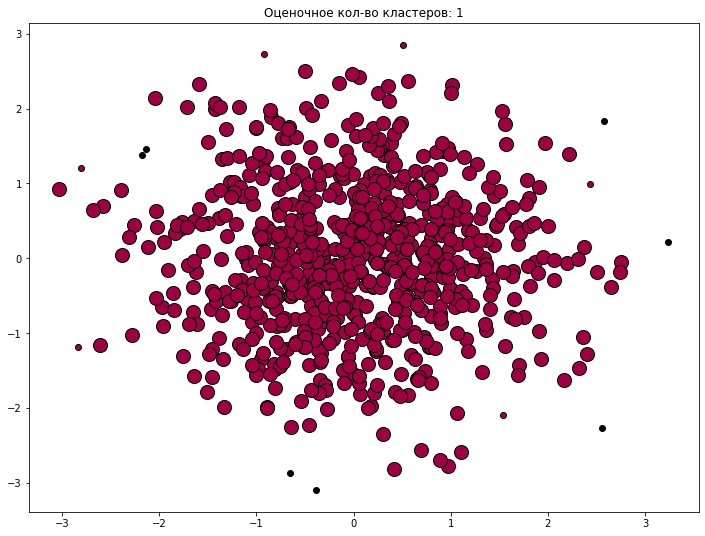

In [ ]:
# Генерируем данные
centers = [[1, 1]]
X, labels_true = make_blobs(n_samples=750, centers=centers, cluster_std=0.4,
                            random_state=0)
X = StandardScaler().fit_transform(X)

# Задаем DBSCAN
db = DBSCAN(eps=0.5, min_samples=3).fit(X)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

# Количество кластеров в метках без учета шума
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print('Оценочное кол-во кластеров: %d' % n_clusters_)
print('Оценочное кол-во точек шума: %d' % n_noise_)
print("Adjusted Rand Index: %0.3f"
      % metrics.adjusted_rand_score(labels_true, labels))
print("Adjusted Mutual Information: %0.3f"
      % metrics.adjusted_mutual_info_score(labels_true, labels))
print("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(X, labels))

# Отрисовка результата
plt.figure(figsize=(12,9))
unique_labels = set(labels)
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Черный цвет используется для выявления шума
        col = [0, 0, 0, 1]
    class_member_mask = (labels == k)
    xy = X[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=14)
    xy = X[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=6)

plt.title('Оценочное кол-во кластеров: %d' % n_clusters_)
plt.show()

<h2>Генерация новых признаков</h2>
<p id="9">Иногда, встает необходимость, когда нужно добавить новые признаки для улучшения работы модели, обогатить датасет новыми данными или других манипуляций. Это достаточно творческая и тонкая работа. Генерировать новые признаки можно большим кол-вом методов: как из какой-то комбинации старых признаков, так и из определенного доменного знания, понимания, анализа и т.д. Это делать стоит аккуратно, чтобы избежать появления скореллированных признаков.</p>
<h3>Вещественные признаки</h3>
<div class="alert alert-info"><i id="10">Создание вещественных признаков</i>
<ul><li>Деформация (монотонная функция степени/логарифма и т.д. над призаком). Используется для сведения признаков в нормальную сторону (норм. распределение).</li><li>Нормировка (специальный вид деформации). Перевод признака в некий удобный диапазон в зависимости от ситуации (например, от 0 до 1/симметрично относительно нуля)</li><li>Новые признаки (функции над несколькими признаками).</li><li>Дискретизация (binning). Иногда используется пороговая функция для разбиения признака на две группы.</li></ul></div>   <p style="align: center;"><img align=center src="https://kharshit.github.io/img/normalization.png"  width=900></p>
<h3>Категориальные признаки</h3>
<p id="11">С категориальными признаками сложнее: для создания новых признаков, для начала их нужно закодировать/заменить.</p>
<div class="alert alert-info"><i>Кодирование категориальных признаков</i>
<ul><li>LabelEncoding - замена категории на число, для использовании в обучении.</li><li>Count Encoding - подсчитывание кол-ва объектов одной категории и замена на число кол-ва (могут быть повторения и наложения).</li><li>OneHotEncoding - обозначение каждой категории 0 или 1. Используется для закрытия пропущенных значений категориальных признаков (вписывается 0).</li><li>TargetEncoding - признаки заменяются смесью апостериорной вероятности цели с учетом конкретного категориального значения и априорной вероятности по всем обучающим данным.</li><li>CategoryEmbedding - замена категорий вектором из какого-то кол-ва чисел. Используется при большом количестве категорий. Аналог word2vec только для категорий.</li></ul><br></div>
<img align=center src="https://miro.medium.com/max/875/1*K5JbqxIwwPmtiSNQhjLPRg.png"  width=800>
<div class="alert alert-info"><i>Создание категориальных признаков</i>
<ul><li>Конъюнкция признаков (объединение двух или более признаков).</li><li>Создание новых признаков по контекстным (на основе категориальных признаков путем анализа построить некую иерархию этих признаков и представить ее как новый признак).</li><li>Экспертное кодирование. Используется когда например имеется какая-то географическая информация и ее требуется разделить по какому-то условию (район --> zip code).</li><li>Случайное кодирование</li></ul>
</div>
<h3>Временные признаки</h3>
<p id="12">Зачастую из вещественных признаков выделяют такую подкатегорию, как временные признаки. Временные признаки характерны тем, что они могут быть цикличны (время, времена года, месяцы и т.д.) и это довольно важная деталь. Рассмотрим основные подходы генерации новых признаков временных данных.</p>
<ul><li>Характеристика момента времени - выделение времени года, месяца, квартала, десятилетия и т.д.</li><li>Циклические признаки.</li><li>Взаимодействие пары признаков. Например, разделение времени на время до чего-нибудь, и после.</li></ul>
    <p style="align: center;"><img align=center src="https://sun9-34.userapi.com/impg/FrQqgmSyGndXnrecFglQZGIUOFSeFtEy6H172Q/y_IgxFlucFM.jpg?size=891x449&quality=96&sign=c2f2bbd8f3aedd7057d2e903d92e3922&type=album"  width=900></p>

<h2>Summary</h2>
<ol><li>Важнейшим этапом <b>предобработки</b> данных является <b>отлавливание и работа с выбросами</b>, которые практически всегда встречаются в датасетах из реальных задач.</li><li><b>Выбросы</b> могут возникать вследствие многих причин, таких как <b>ручной ввод данных, посторонние шумы</b>, наличие других выборок, чуждых основной выборке.</li><li><b>Генерация новых признаков</b> помогает <b>обогатить</b> датасет новыми данными и значительно улучшает работу модели в разных ситцациях. Также стоит помнить, что нужно <b>избегать</b> появления <b>скореллированных признаков.</b></li></ol>

<h3>Вопросы для самопроверки</h3>
<p><ol><li>Какие методы выявления выбросов вы знаете? Для чего это нужно?</li><li>Какие могут быть причины появления таких выбросов?</li><li>Для чего нужна генерация новых признаков и чего при этом стоит избегать?</li></ol></p>

<h1>Спасибо за внимание!</h1>